### Ön işleme

In [49]:
import pandas as pd 

df = pd.read_csv('../Datasets/iris_data.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
X = df.iloc[:,:4]
y = df.iloc[:,-1]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1)

print('Train shape:', X_train.shape, '\n', 'Test shape:', X_test.shape)

Train shape: (120, 4) 
 Test shape: (30, 4)


Eğer veride yüksek seviyede varyans var ise verileri normalleştirmek makinemizin öğrenmesi ve bizim analiz etmemiz adına yararlı olacaktır.

In [52]:
X_train.var(), X_test.var()

(sepal length (cm)    0.693476
 sepal width (cm)     0.176688
 petal length (cm)    3.140235
 petal width (cm)     0.603243
 dtype: float64,
 sepal length (cm)    0.676885
 sepal width (cm)     0.220931
 petal length (cm)    3.069483
 petal width (cm)     0.501655
 dtype: float64)

İris tiplerini belirten hedef değişkenimiz "Type" 3 farklı sınıftan (0,1,2) . bunu OHE (One Hot Encoding) ile kodlayalım. Ancak bunu keras kullanarak yapalım.

In [53]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

Bu kodlama sonucunda [0,1,0] versicolor ve [0,0,1] virginica 'yı göstermektedir. 

Şimdi şöyle type error yememek için çıktı verilerimiz numpy ndarray ve girdi verilerimiz pandas df iken hepsini numpy ndarray yapalım.

In [54]:
X_train = X_train.values
X_test = X_test.values

print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Veri ön işleme işlemimiz tamam artık verilerimiz model için hazır. Burada hazır veri seti kullandığımız için bu kısım çok kısa sürdü, ancak gerçek dünya verileri ile uğraşırken en çok zaman alan kısım genelde bu oluyor. 

### Sinir Ağları
Derin öğrenme modelleri sinir ağları kullanılarak oluşturur. Girdi katmanları ağırlıklandırmalar ile gizli katmanlarda işlenip çıktı katmanına iletilir. Bu öğrenme süreci (ağırlıklandırma ile en iyi modeli bulma süreci) çıkış katmanına kadar kaç gizli katman varsa o kadar boyunca güncellenir.  

Amacımız en iyi tahmini yapacak modellemeyi bulmaktır. Ancak yapay sinir ağları kapalı kutu (BlackBox) sistemdir. Yani sinir ağının en iyi modeli nasıl bulunduğu bilinmez. Girdiler sinir ağına verilir, ağ ağırlıkları güncelleyerek en iyi modeli bulur.  

In [55]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(81, activation='relu', input_shape=X_train[0].shape))
model.add(Dense(121, activation='relu'))
model.add(Dense(121, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) # çoklu categorik çıktı için softmax alıyorum eğer ikili olsaydı sigmoid alırdım.

In [56]:
model.compile(optimizer='adam', 
            loss='categorical_crossentropy', # çoklu sınıflandırma olduğu için 'categorical_crossentropy' alıyorum.
            metrics = ['acc']) 
fitting = model.fit(X_train, y_train,
        batch_size=35, # batch size argümanı model öğrenirken kaçar örneklem alarak öğrensin onu belirler
        epochs=5, # epochs sayısı modelin eğitim serisini kaç kere göreceğini belirler epochs sayısı artarsa öğrenim süresi de artar
        validation_split=.1 # validation modelin eğitiminin iyileştirilmesi için kullanılır. eğitim verisinin %10 u validation için kullanılsın.
        )

Epoch 1/5
4/4 [==============================] - 1s 78ms/step - loss: 1.0732 - acc: 0.3704 - val_loss: 0.8660 - val_acc: 0.9167
Epoch 2/5
4/4 [==============================] - 0s 13ms/step - loss: 0.8323 - acc: 0.7037 - val_loss: 0.7279 - val_acc: 0.7500
Epoch 3/5
4/4 [==============================] - 0s 15ms/step - loss: 0.7064 - acc: 0.8148 - val_loss: 0.6415 - val_acc: 0.9167
Epoch 4/5
4/4 [==============================] - 0s 12ms/step - loss: 0.5819 - acc: 0.9352 - val_loss: 0.5161 - val_acc: 0.9167
Epoch 5/5
4/4 [==============================] - 0s 13ms/step - loss: 0.5018 - acc: 0.7222 - val_loss: 0.4523 - val_acc: 0.9167


Her bir epoch süresince ne tür gelişim katettiğini gördük. Son durumda eğitim serisinin doğruluğu %74 validation verisinin doğruluğu ise %91 olarak çıkmış.  

Validation doğruluğu eğitimin doğruluğundan yüksek olduğu için *"underfitting"* modelde düşük uydurma problemi vardır diyebiliriz.

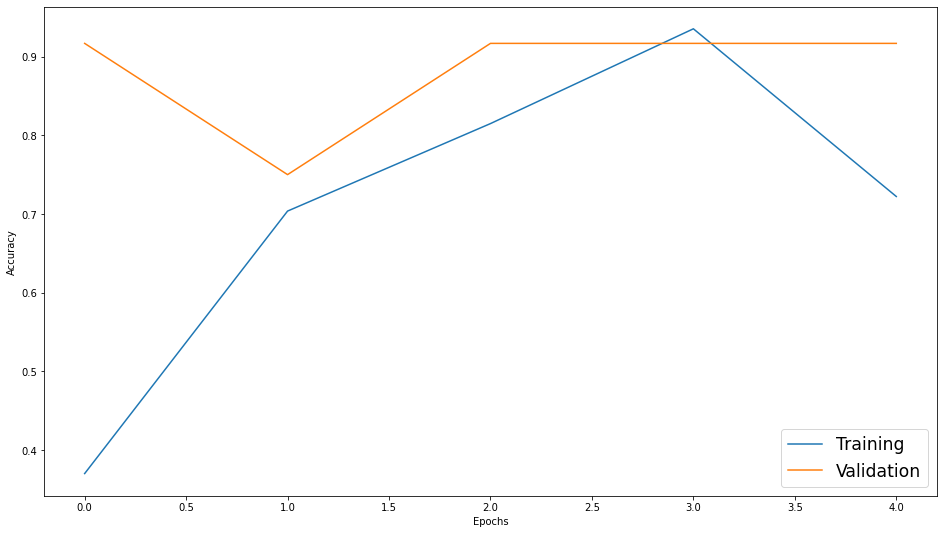

In [62]:
import matplotlib.pyplot as plt 

%matplotlib inline

plt.figure(figsize=(16,9))
plt.plot(fitting.history['acc'])
plt.plot(fitting.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], fontsize='xx-large', loc='lower right')
plt.savefig('../Images/neural_network_accuracy.png')
plt.show()

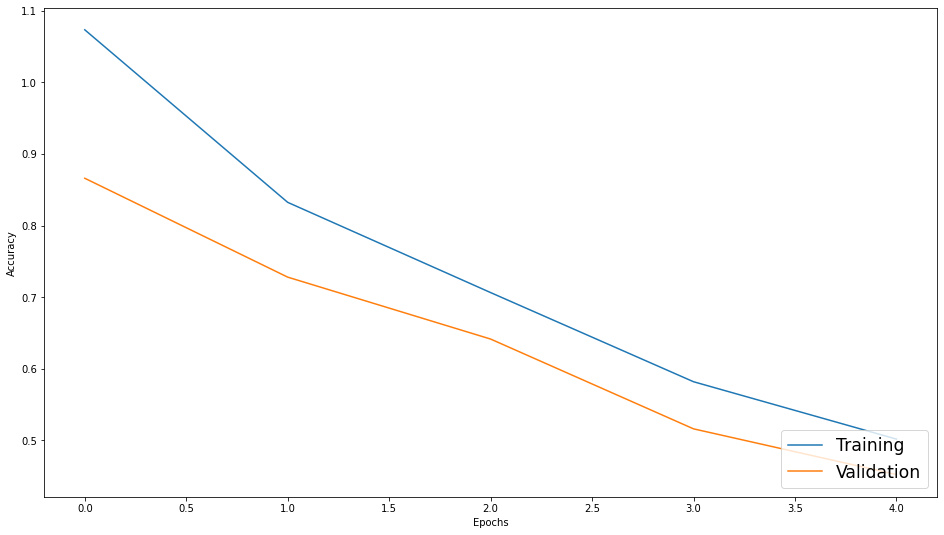

In [64]:
import matplotlib.pyplot as plt 

%matplotlib inline

plt.figure(figsize=(16,9))
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], fontsize='xx-large', loc='lower right')
plt.savefig('../Images/neural_network_loss.png')
plt.show()

In [65]:
model.evaluate(X_test, y_test) # kurulan model yeni bir veriyi %76,6 oranında doğru tahmin ediyor. Biraz daha derin bir model deneyelim. 

1/1 [==============================] - 0s 27ms/step - loss: 0.4743 - acc: 0.7667


[0.47433432936668396, 0.7666666507720947]

In [68]:
model2 = Sequential()
model2.add(Dense(81, activation='relu', input_shape=X_train[0].shape))
model2.add(Dense(121, activation='relu'))
model2.add(Dense(121, activation='relu'))
model2.add(Dense(144, activation='relu'))
model2.add(Dense(169, activation='relu'))
model2.add(Dense(144, activation='relu'))
model2.add(Dense(121, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc']) 
fitting2 = model2.fit(X_train, y_train, batch_size=35, epochs=10, validation_split=.1)

Epoch 1/10
4/4 [==============================] - 1s 71ms/step - loss: 1.0479 - acc: 0.6852 - val_loss: 0.8890 - val_acc: 0.7500
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.8947 - acc: 0.6852 - val_loss: 0.6850 - val_acc: 0.7500
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6606 - acc: 0.6852 - val_loss: 0.5626 - val_acc: 0.9167
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.4594 - acc: 0.9722 - val_loss: 0.3731 - val_acc: 0.8333
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.3795 - acc: 0.7500 - val_loss: 0.2999 - val_acc: 0.9167
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.2672 - acc: 0.8981 - val_loss: 0.2454 - val_acc: 0.9167
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 0.1726 - acc: 0.9630 - val_loss: 0.4004 - val_acc: 0.7500
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.1729 - acc: 0.9630 - val

In [70]:
model2.evaluate(X_test, y_test) # doğrululuk oranı %86,6 ya çıktı.

1/1 [==============================] - 0s 25ms/step - loss: 0.1949 - acc: 0.8667


[0.1949438601732254, 0.8666666746139526]